In [1]:
%display plain
#%display latex

In [2]:
from matplotlib import cm
import numpy as np
import itertools
from itertools import combinations
from __future__ import print_function

In [3]:
real_vars = var('r,t,theta,phi,x,y,z')
for rv in real_vars:
    assume(rv, 'real')

In [4]:
xs = var(['x{}'.format(n) for n in range(4)])
for xi in xs: assume(xi,'real')

ys = var(['y{}'.format(n) for n in range(3)])
for yi in ys: assume(yi,'real')
    
xs, ys

((x0, x1, x2, x3), (y0, y1, y2))

In [5]:
p1 = sum([xi   for xi in xs])
p2 = sum([xi^2 for xi in xs])
p3 = sum([xi^3 for xi in xs])
p4 = sum([xi^4 for xi in xs])

p1, p2, p3, p4

(x0 + x1 + x2 + x3,
 x0^2 + x1^2 + x2^2 + x3^2,
 x0^3 + x1^3 + x2^3 + x3^3,
 x0^4 + x1^4 + x2^4 + x3^4)

In [6]:
e1 = sum([ xi          for (xi,        ) in combinations(xs,1)])
e2 = sum([ xi*xj       for (xi,xj      ) in combinations(xs,2)])
e3 = sum([ xi*xj*xk    for (xi,xj,xk   ) in combinations(xs,3)])
e4 = sum([ xi*xj*xk*xl for (xi,xj,xk,xl) in combinations(xs,4)])

e1, e2, e3, e4

(x0 + x1 + x2 + x3,
 x0*x1 + x0*x2 + x1*x2 + x0*x3 + x1*x3 + x2*x3,
 x0*x1*x2 + x0*x1*x3 + x0*x2*x3 + x1*x2*x3,
 x0*x1*x2*x3)

In [7]:
def inner_product(f,g,vrs):
    ip = (f.conjugate()*g).expand()*exp(-sum([vi^2 for vi in vrs]))/(2*pi)^len(vrs)
    # odd parts will integrate out, so remove them. makes this go quite a bit faster
    for vi in vrs:
        ip = ((ip+ip(vi=-vi))/2).simplify_full()
    for vi in vrs:
        ip = integrate(ip,vi,-oo,oo)
    return ip

In [8]:
com = vector([1,1,1,1])/sqrt(4) # center of mass

j1 = vector(QQ,[1,0,0,0])
j2 = vector(QQ,[0,1,0,0])
j3 = vector(QQ,[0,0,1,0])

j1 = j1 - (j1*com)*com/com.norm()^2
j2 = j2 - (j2*com)*com/com.norm()^2
j3 = j3 - (j3*com)*com/com.norm()^2

j2 = j2 - (j2*j1)*j1/j1.norm()^2
j3 = j3 - (j3*j1)*j1/j1.norm()^2

j3 = j3 - (j3*j2)*j2/j2.norm()^2

j1 = j1/j1.norm()
j2 = j2/j2.norm()
j3 = j3/j3.norm()

In [9]:
Pm = matrix([com,j1,j2,j3]).transpose()

Qm = matrix([[0,0,0],
             [1,0,0],
             [0,1,0],
             [0,0,1]])

In [10]:
M1 = matrix([[1,1,1,1],[1,-1,0,0],[0,1,-1,0]])
M2 = matrix([[1,1,1,1],[1,-1,0,0],[0,1,0,-1]])
M3 = matrix([[1,1,1,1],[1,0,-1,0],[0,0,1,-1]])
M4 = matrix([[1,1,1,1],[0,1,-1,0],[0,0,1,-1]])

Pl = matrix([j1,j2,j3]).transpose()

# the (4 choose 3) 3-body interations in 3 dimensions

tbi3_1 = (M1*Pl).right_kernel().basis_matrix()[0]
tbi3_2 = (M2*Pl).right_kernel().basis_matrix()[0]
tbi3_3 = (M3*Pl).right_kernel().basis_matrix()[0]
tbi3_4 = (M4*Pl).right_kernel().basis_matrix()[0]

tbi3_1 = (tbi3_1/tbi3_1.norm()).simplify_full()
tbi3_2 = (tbi3_2/tbi3_2.norm()).simplify_full()
tbi3_3 = (tbi3_3/tbi3_3.norm()).simplify_full()
tbi3_4 = (tbi3_4/tbi3_4.norm()).simplify_full()

tbi3s = tbi3_1, tbi3_2, tbi3_3, tbi3_4
signed_tbi3s = (tbi3_1, -tbi3_1,
                tbi3_2, -tbi3_2,
                tbi3_3, -tbi3_3,
                tbi3_4, -tbi3_4)
sym_tbi3s = tbi3_1, tbi3_2, tbi3_3, -tbi3_4

In [11]:
# the (4 choose 3) 3-body interations in 4 dimensions

tbi4_1 = M1.right_kernel().basis_matrix()[0]
tbi4_2 = M2.right_kernel().basis_matrix()[0]
tbi4_3 = M3.right_kernel().basis_matrix()[0]
tbi4_4 = M4.right_kernel().basis_matrix()[0]

tbi4_1 = (tbi4_1/tbi4_1.norm()).simplify_full()
tbi4_2 = (tbi4_2/tbi4_2.norm()).simplify_full()
tbi4_3 = (tbi4_3/tbi4_3.norm()).simplify_full()
tbi4_4 = (tbi4_4/tbi4_4.norm()).simplify_full()

for (tbi3, tbi4) in zip([tbi3_1, tbi3_2, tbi3_3, tbi3_4], [tbi4_1, tbi4_2, tbi4_3, tbi4_4]):
    assert tbi4 == (Pm*Qm*tbi3).simplify()

tbi4s = tbi4_1, tbi4_2, tbi4_3, tbi4_4
signed_tbi4s = (tbi4_1, -tbi4_1,
                tbi4_2, -tbi4_2,
                tbi4_3, -tbi4_3,
                tbi4_4, -tbi4_4)
sym_tbi4s = tbi4_1, tbi4_2, tbi4_3, -tbi4_4

In [12]:
f1 = e1(*(Pm*Qm*vector(ys))).simplify_full()
f2 = e2(*(Pm*Qm*vector(ys))).simplify_full()
f3 = e3(*(Pm*Qm*vector(ys))).simplify_full()
f4 = e4(*(Pm*Qm*vector(ys))).simplify_full()

f1, f2, f3, f4

(0,
 -1/2*y0^2 - 1/2*y1^2 - 1/2*y2^2,
 1/18*sqrt(3)*(sqrt(2)*y1^3 + 2*y0^3 - 3*y0*y1^2 - 3*(sqrt(2)*y1 + y0)*y2^2),
 -1/96*sqrt(2)*(sqrt(2)*y0^4 - 6*sqrt(2)*y0^2*y1^2 - 8*y0*y1^3 - 6*(sqrt(2)*y0^2 - 4*y0*y1)*y2^2))

In [13]:
P_threecurves = Graphics()

for (wi, wj) in [(-tbi3_1,-tbi3_2), 
                 (-tbi3_1,-tbi3_3),
                 (-tbi3_1, tbi3_4),
                 (-tbi3_2,-tbi3_3),
                 (-tbi3_2, tbi3_4),
                 (-tbi3_3, tbi3_4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    P_threecurves += parametric_plot3d(three_curve,
                         (t,0,pi/2),
                         thickness=4,
                         color=rainbow(3)[0])
        
    P_threecurves += parametric_plot3d(three_curve,
                         (t,pi/2,pi),
                         thickness=4,
                         color=rainbow(3)[1])
        
    P_threecurves += parametric_plot3d(three_curve,
                         (t,pi,3*pi/2),
                         thickness=4,
                         color=rainbow(3)[2])
    
    P_threecurves += parametric_plot3d(three_curve,
                         (t,3*pi/2, 2*pi),
                         thickness=4,
                         color=rainbow(3)[1])
    
#P.show()

In [14]:
def stereographic_proj(v):
    """ Standard Stereographic projection with possible pre-rotation about X, Y and Z axis"""
    w = vector(v)
    return (w[0]/(1-w[2]),w[1]/(1-w[2]))

def to_iso_spherical_coords(v):
    x, y, z = v
    r = sqrt(x^2+y^2+z^2)
    theta = arccos(z/r)
    phi = atan2(y,x)
    return (r,theta,phi)

def to_iso_sphere_coords(v):
    r, theta, phi = to_iso_spherical_coords(v)
    return (phi, theta) #(theta, phi)

In [15]:
P_twocurves = Graphics()

var('t')

# the 2-interations
for (wi, wj) in [(-tbi3_1,-tbi3_2), 
                 (-tbi3_1,-tbi3_3),
                 (-tbi3_1, tbi3_4),
                 (-tbi3_2,-tbi3_3),
                 (-tbi3_2, tbi3_4),
                 (-tbi3_3, tbi3_4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    #two_curve = vector(stereographic_proj(three_curve)).simplify()
    two_curve = vector(to_iso_sphere_coords(three_curve)).simplify()
    if (wi == -tbi3_1 or wi == -tbi3_2) and wj == -tbi3_3:
        P_twocurves += parametric_plot(two_curve,
                             (t,0,arctan(1/2)-1e-2),
                             thickness=2,
                             color=rainbow(3)[0])
        P_twocurves += parametric_plot(two_curve,
                             (t,arctan(1/2)+1e-2,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
    else:
        P_twocurves += parametric_plot(two_curve,
                             (t,0,pi/2),
                             thickness=2,
                             color=rainbow(3)[0])
        
    if not( wi == -tbi3_1 and wj == -tbi3_2 ):
        P_twocurves += parametric_plot(two_curve,
                             (t,pi/2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    else:
        P_twocurves += parametric_plot(two_curve,
                             (t,pi/2,3*pi/4-1e-2),
                             thickness=2,
                             color=rainbow(3)[1])
        P_twocurves += parametric_plot(two_curve,
                             (t,3*pi/4+1e-2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
        
    P_twocurves += parametric_plot(two_curve,
                         (t,pi,3*pi/2),
                         thickness=2,
                         color=rainbow(3)[2])
    if not( wi == -tbi3_1 and wj == -tbi3_2 ):
        P_twocurves += parametric_plot(two_curve,
                             (t,3*pi/2+1e-3,2*pi-1e-3),
                             thickness=2,
                             color=rainbow(3)[1])
    else:
        P_twocurves += parametric_plot(two_curve,
                             (t,3*pi/2, 7*pi/4-1e-4),
                             thickness=2,
                             color=rainbow(3)[1])
        P_twocurves += parametric_plot(two_curve,
                             (t,7*pi/4+1e-4,2*pi),
                             thickness=2,
                             color=rainbow(3)[1])
    

for tbi3 in signed_tbi3s:   
    P_twocurves += point(to_iso_sphere_coords( tbi3), size=100, color='black')
    P_twocurves[-1].set_zorder(10)
    
#P_twocurves.show(aspect_ratio=1,axes=False)

In [16]:
def legendre_poly(n):
    return diff( (x^2-1)^n, x, n)/(2^n*factorial(n))

def assoc_legendre_poly(m,l):
    if m >= 0:
        return (-1)^m * (1-x^2)^(m/2) *diff(legendre_poly(l),x,m)
    else:
        return (-1)^m * factorial(l-m) /factorial(l+m) * assoc_legendre_poly(-m,l)

def real_sh(m,l):
    return r^(l)*cos(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def imag_sh(m,l):
    return r^(l)*sin(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def polar_to_euclid(f):
    return ( f(theta=arccos(y2/r)) )(r=sqrt(y0^2+y1^2+y2^2), phi=atan2(y1,y0))

def euclid_real(m,l):
    return polar_to_euclid(real_sh(m,l)).simplify()

def euclid_imag(m,l):
    return polar_to_euclid(imag_sh(m,l)).simplify()

def euclid_to_sphere(f):
    return f(y0=r*sin(theta)*cos(phi),y1=r*sin(theta)*sin(phi),y2=r*cos(theta))

In [73]:
# a harmonic symmetric function of degree 3 in 4 variables
sym_fn_3 = 0
ell = 3
for tbi4 in sym_tbi4s:
    sym_fn_3 += (r^ell*gegenbauer(ell,4/2-1,
                                  (tbi4/norm(tbi4))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()

# check symmetry
assert (sym_fn_3(x0=x1,x1=x0)-sym_fn_3).expand() == 0
assert (sym_fn_3(x0=x2,x2=x0)-sym_fn_3).expand() == 0
assert (sym_fn_3(x0=x3,x3=x0)-sym_fn_3).expand() == 0

sym_fn_3.expand()

-8/3*sqrt(3)*x0^3 + 8/3*sqrt(3)*x0^2*x1 + 8/3*sqrt(3)*x0*x1^2 - 8/3*sqrt(3)*x1^3 + 8/3*sqrt(3)*x0^2*x2 - 16/3*sqrt(3)*x0*x1*x2 + 8/3*sqrt(3)*x1^2*x2 + 8/3*sqrt(3)*x0*x2^2 + 8/3*sqrt(3)*x1*x2^2 - 8/3*sqrt(3)*x2^3 + 8/3*sqrt(3)*x0^2*x3 - 16/3*sqrt(3)*x0*x1*x3 + 8/3*sqrt(3)*x1^2*x3 - 16/3*sqrt(3)*x0*x2*x3 - 16/3*sqrt(3)*x1*x2*x3 + 8/3*sqrt(3)*x2^2*x3 + 8/3*sqrt(3)*x0*x3^2 + 8/3*sqrt(3)*x1*x3^2 + 8/3*sqrt(3)*x2*x3^2 - 8/3*sqrt(3)*x3^3

In [74]:
# does not vanish at the 3 body coincidences
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_3(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]) )

64/9*t^3

-64/9*t^3

64/9*t^3

-64/9*t^3

64/9*t^3

-64/9*t^3

-64/9*t^3

64/9*t^3

In [75]:
# a harmonic symmetric function of degree 4 in 4 variables
sym_fn_4 = 0
ell = 4
for tbi4 in sym_tbi4s:
    sym_fn_4 += (r^ell*gegenbauer(ell,4/2-1,
                                  (tbi4/norm(tbi4))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()
    
# check symmetry
assert (sym_fn_4(x0=x1,x1=x0)-sym_fn_4).expand() == 0
assert (sym_fn_4(x0=x2,x2=x0)-sym_fn_4).expand() == 0
assert (sym_fn_4(x0=x3,x3=x0)-sym_fn_4).expand() == 0

sym_fn_4.expand()

4/3*x0^4 - 40/9*x0^3*x1 - 8/3*x0^2*x1^2 - 40/9*x0*x1^3 + 4/3*x1^4 - 40/9*x0^3*x2 + 40/3*x0^2*x1*x2 + 40/3*x0*x1^2*x2 - 40/9*x1^3*x2 - 8/3*x0^2*x2^2 + 40/3*x0*x1*x2^2 - 8/3*x1^2*x2^2 - 40/9*x0*x2^3 - 40/9*x1*x2^3 + 4/3*x2^4 - 40/9*x0^3*x3 + 40/3*x0^2*x1*x3 + 40/3*x0*x1^2*x3 - 40/9*x1^3*x3 + 40/3*x0^2*x2*x3 - 32*x0*x1*x2*x3 + 40/3*x1^2*x2*x3 + 40/3*x0*x2^2*x3 + 40/3*x1*x2^2*x3 - 40/9*x2^3*x3 - 8/3*x0^2*x3^2 + 40/3*x0*x1*x3^2 - 8/3*x1^2*x3^2 + 40/3*x0*x2*x3^2 + 40/3*x1*x2*x3^2 - 8/3*x2^2*x3^2 - 40/9*x0*x3^3 - 40/9*x1*x3^3 - 40/9*x2*x3^3 + 4/3*x3^4

In [76]:
# does not vanish at the 3 body coincidences
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_4(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]) )

124/27*t^4

124/27*t^4

124/27*t^4

124/27*t^4

124/27*t^4

124/27*t^4

124/27*t^4

124/27*t^4

In [77]:
sym_fn_12 = 0
ell = 12
for tbi4 in sym_tbi4s:
    sym_fn_12 += (r^ell*gegenbauer(ell,4/2-1,
                                   (tbi4/norm(tbi4))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()
    
# check symmetry    
assert (sym_fn_12(x0=x1,x1=x0)-sym_fn_12).expand() == 0
assert (sym_fn_12(x0=x2,x2=x0)-sym_fn_12).expand() == 0
assert (sym_fn_12(x0=x3,x3=x0)-sym_fn_12).expand() == 0


#sym_fn_12.expand()

In [78]:
# does not vanish at the 3 body coincidences
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_12(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]), end='  ' )

2139292/177147*t^12

2139292/177147*t^12

2139292/177147*t^12

2139292/177147*t^12

2139292/177147*t^12

2139292/177147*t^12

2139292/177147*t^12

2139292/177147*t^12

In [27]:
def lap(f,vrs):
    """ laplacian """
    return sum([diff(f,vi,2) for vi in vrs])

def rep_lap(f,k,vrs):
    """ repeated laplacian  """
    if k <= 0:
        return f
    elif k == 1:
        return lap(f,vrs)
    else:
        return lap(rep_lap(f,k-1,vrs),vrs)
    
def semi_factorial(n):
    """ product: n*(n-2)*(n-4)*...*1 """
    if n <= 1:
        return 1
    else:
        return n*semi_factorial(n-2)
    
def harmonic_leading_term(f,n,vrs):
    """ as in (1-33), pg 8 of Avery's Hyperspherical Harmonics, Applications in Quantu Theory """
    r_sq = sum([vi^2 for vi in vrs])
    d = len(vrs)
    return sum([ ((-1)^k)*semi_factorial(d+2*n-2*k-4) \
                / ( semi_factorial(2*k) * semi_factorial(d+2*n-4) ) \
                * (r_sq^k) * rep_lap(f,k,vrs) for k in range(floor(n/2)+1)])

In [79]:
# two more degree 12 harmonic polynomials, corresponding to the harmonic degree 3 and 4 polys to the 4th and 3rd, respectively

sym_fn_3_4 = harmonic_leading_term(sym_fn_3^4,12,xs).simplify().expand()

assert lap(sym_fn_3_4, xs).simplify_full() == 0

sym_fn_4_3 = harmonic_leading_term(sym_fn_4^3,12,xs).simplify().expand()

assert lap(sym_fn_4_3, xs).simplify_full() == 0

In [31]:
# a symmetric, harmonic polynomial of degree 12 which vanishes at the 3 body coincidences

sym_fn_12p = (((sym_fn_3_4)/(sym_fn_3_4)(x0=tbi4_1[0],x1=tbi4_1[1],x2=tbi4_1[2],x3=tbi4_1[3])) - \
              (sym_fn_4_3)/(sym_fn_4_3)(x0=tbi4_1[0],x1=tbi4_1[1],x2=tbi4_1[2],x3=tbi4_1[3])).expand()

for tbi4 in signed_tbi4s:
    assert sym_fn_12p(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]) == 0
    
assert lap(sym_fn_12p,xs).simplify() == 0

In [91]:
# in spherical coordinates
sphere_wv = euclid_to_sphere(wv).simplify_full()(r=1).simplify_full()

# normalized
sphere_wv = sphere_wv/sqrt(integrate(integrate(sphere_wv^2,phi,-pi,pi)*sin(theta),theta,0,pi))

In [102]:
R.<x0p,x1p,x2p,x3p> = PolynomialRing(AA)
a_e1 = R(e1(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_e2 = R(e2(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_e3 = R(e3(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_e4 = R(e4(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p1 = R(p1(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p2 = R(p2(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p3 = R(p3(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p4 = R(p4(x0=x0p,x1=x1p,x2=x2p,x3=x3p))

In [165]:
poly_degree = 8

def get_monomials(degree=12):
    powers = [(exp1,exp2,exp3,exp4)
              for exp1, exp2, exp3, exp4 in itertools.product(range(0,degree+1),repeat=4)
              if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == degree]
    monomials = set()
    for (exp1,exp2,exp3,exp4) in powers:
        monomials = monomials.union((a_e1^exp1 * a_e2^exp2 * a_e3^exp3 * a_e4^exp4).dict().keys())
    monomials = list(monomials)
    monomials.sort()
    basis_dict = { mon: n for n, mon in enumerate(monomials)}
    rev_basis_dict = { n: mon for n, mon in enumerate(monomials)}
    return basis_dict, rev_basis_dict
    
basis_dict, rev_basis_dict = get_monomials(degree=poly_degree)

def poly_to_vec(p):
    dp = p.dict()
    return vector([ dp[monomial] if monomial in dp else 0 for monomial in basis_dict.keys()])
        
def get_sym_matrix(degree=12):
    powers = [(exp1,exp2,exp3,exp4) 
              for exp1, exp2, exp3, exp4 in itertools.product(range(0,degree+1),repeat=4)
              if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == degree]
    return matrix([poly_to_vec(a_e1^exp1 * a_e2^exp2 * a_e3^exp3 * a_e4^exp4) 
                   for (exp1,exp2,exp3,exp4) in powers ])

rows, cols = get_sym_matrix(degree=poly_degree).dimensions()

mat = get_sym_matrix(degree=poly_degree)

In [166]:
efs = var(['ef{}'.format(n) for n in range(rows)])

vefs = vector(efs)

In [173]:
a_wavef4 = R(g_8_harm(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
v_wavef4 = poly_to_vec(a_wavef4)

In [174]:
solve(list(vefs*mat - v_wavef4), list(efs))

[[ef0 == 16, ef1 == 3, ef2 == -4, ef3 == (3/10), ef4 == -8, ef5 == -2, ef6 == (5/2), ef7 == 5, ef8 == (2/5), ef9 == -2, ef10 == (-1/2), ef11 == (1/5), ef12 == (1/2), ef13 == (-3/20), ef14 == (3/160)]]

In [175]:
import itertools
for eqn in zip(solve(list(vefs*mat - v_wavef4), list(efs))[0], 
               [(exp1,exp2,exp3,exp4) 
                for exp1, exp2, exp3, exp4 in itertools.product(range(0,poly_degree+1),repeat=4)
                if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == poly_degree]):
    print(*eqn)

ef0 == 16 (0, 0, 0, 2)
ef1 == 3 (0, 1, 2, 0)
ef2 == -4 (0, 2, 0, 1)
ef3 == (3/10) (0, 4, 0, 0)
ef4 == -8 (1, 0, 1, 1)
ef5 == -2 (1, 2, 1, 0)
ef6 == (5/2) (2, 0, 2, 0)
ef7 == 5 (2, 1, 0, 1)
ef8 == (2/5) (2, 3, 0, 0)
ef9 == -2 (3, 1, 1, 0)
ef10 == (-1/2) (4, 0, 0, 1)
ef11 == (1/5) (4, 2, 0, 0)
ef12 == (1/2) (5, 0, 1, 0)
ef13 == (-3/20) (6, 1, 0, 0)
ef14 == (3/160) (8, 0, 0, 0)


In [172]:
g_8 = product(xs[i]^2+xs[j]^2+xs[k]^2-xs[i]*xs[j]-xs[i]*xs[k]-xs[j]*xs[k] for i, j, k in combinations(range(4),3) )

g_8_harm = harmonic_leading_term(g_8,8,xs).simplify().expand()

g_8_harm

3/160*x0^8 - 7/40*x0^6*x1^2 + 49/80*x0^4*x1^4 - 7/40*x0^2*x1^6 + 3/160*x1^8 - 7/40*x0^6*x2^2 - 21/40*x0^4*x1^2*x2^2 - 21/40*x0^2*x1^4*x2^2 - 7/40*x1^6*x2^2 + 49/80*x0^4*x2^4 - 21/40*x0^2*x1^2*x2^4 + 49/80*x1^4*x2^4 - 7/40*x0^2*x2^6 - 7/40*x1^2*x2^6 + 3/160*x2^8 - 7/40*x0^6*x3^2 - 21/40*x0^4*x1^2*x3^2 - 21/40*x0^2*x1^4*x3^2 - 7/40*x1^6*x3^2 - 21/40*x0^4*x2^2*x3^2 + 189/20*x0^2*x1^2*x2^2*x3^2 - 21/40*x1^4*x2^2*x3^2 - 21/40*x0^2*x2^4*x3^2 - 21/40*x1^2*x2^4*x3^2 - 7/40*x2^6*x3^2 + 49/80*x0^4*x3^4 - 21/40*x0^2*x1^2*x3^4 + 49/80*x1^4*x3^4 - 21/40*x0^2*x2^2*x3^4 - 21/40*x1^2*x2^2*x3^4 + 49/80*x2^4*x3^4 - 7/40*x0^2*x3^6 - 7/40*x1^2*x3^6 - 7/40*x2^2*x3^6 + 3/160*x3^8

In [183]:
wv = g_8_harm(*(Pm*Qm*vector(ys))).simplify_full().expand()

for tbi3 in signed_tbi3s:
    pretty_print( wv(y0=t*tbi3[0],y1=t*tbi3[1],y2=t*tbi3[2]) )

sphere_wv = euclid_to_sphere(wv).simplify_full()(r=1).simplify_full()

sphere_wv

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

1/2880*sqrt(2)*(10*(17*sqrt(2)*cos(phi)^8 + 288*sqrt(2)*cos(phi)^6 - 768*sqrt(2)*cos(phi)^4 + 512*sqrt(2)*cos(phi)^2 + 112*(cos(phi)^7 - 4*cos(phi)^5)*sin(phi))*sin(theta)^8 - 20*(161*sqrt(2)*cos(phi)^6 - 462*sqrt(2)*cos(phi)^4 + 336*sqrt(2)*cos(phi)^2 - 28*(5*cos(phi)^5 + 4*cos(phi)^3)*sin(phi) + 32*sqrt(2))*sin(theta)^6 - 30*(49*sqrt(2)*cos(phi)^4 + 56*cos(phi)^3*sin(phi) - 56*sqrt(2)*cos(phi)^2 - 32*sqrt(2))*sin(theta)^4 - 360*sqrt(2)*sin(theta)^2 + 27*sqrt(2))

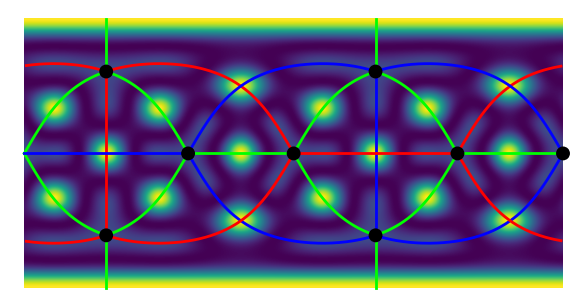

In [184]:
Pmag = density_plot(abs(sphere_wv)^2, (phi,-pi,pi), (theta,0,pi), cmap=cm.viridis,
                    plot_points=200,aspect_ratio=1,axes=False)

Pmag + P_twocurves